In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Usual Packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import models/classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#Import sklearn packages for measuring performance, oversampling and parameter tuning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('application_data.csv')

In [4]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
cols = [1,2,3,4,5,6,7,8,9,12,13,14,15,17,28,30]
data = data[data.columns[cols]]

In [7]:
data.columns = ['Default', 'Loan Type', 'Gender', 'Own Car', 'Own Home', 'No. Children', 'Annual Total Income', 'Loan Value', 'Amount Due on Annuity', 'Income Type', 'Education', 'Family Status', 'Type of House', 'Age', 'Occupation', 'Region Rating of Residency']

In [8]:
data

,Default,Loan Type,Gender,Own Car,Own Home,No. Children,Annual Total Income,Loan Value,Amount Due on Annuity,Income Type,Education,Family Status,Type of House,Age,Occupation,Region Rating of Residency
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,Laborers,2
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,-16765,Core staff,1
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,Laborers,2
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,Laborers,2
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,Core staff,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,-9327,Sales staff,1
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,NaN,2
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,-14966,Managers,3
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,Laborers,2


In [9]:
data.duplicated().sum()

17

In [10]:
data.drop_duplicates(inplace=True)

/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [11]:
data.dropna(inplace=True)

/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [12]:
data.isnull().sum()

Default                       0
Loan Type                     0
Gender                        0
Own Car                       0
Own Home                      0
No. Children                  0
Annual Total Income           0
Loan Value                    0
Amount Due on Annuity         0
Income Type                   0
Education                     0
Family Status                 0
Type of House                 0
Age                           0
Occupation                    0
Region Rating of Residency    0
dtype: int64

In [13]:
data['Age'] = data['Age'].astype(str)
data['Age'] = data['Age'].str.replace('-', '')
data['Age'] = data['Age'].astype(int)

/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/1276893514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].astype(str)
/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/1276893514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].str.replace('-', '')
/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/1276893514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [14]:
data['Age'] = data['Age'].div(365)

/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/3583388463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].div(365)


In [15]:
data['Age'] = data['Age'].round(0).astype(int)

/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/3821807250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].round(0).astype(int)


In [16]:
data['Loan Type'].replace(['Cash loans', 'Revolving loans'],[1, 2],inplace=True)
data['Gender'].replace(['M', 'F'],[1, 2],inplace=True)
data['Own Car'].replace(['Y', 'N'],[1, 2],inplace=True)
data['Own Home'].replace(['Y', 'N'],[1, 2],inplace=True)
data['Education'].replace(['Academic degree', 'Higher education', 
                           'Incomplete higher', 'Lower secondary', 
                           'Secondary / secondary special'],
                          [1, 2, 3, 4, 5],inplace=True)

data['Family Status'].replace(['Civil marriage', 'Married', 
                               'Separated', 'Single / not married', 
                               'Unknown', 'Widow'],[1, 2, 3, 4, 5, 6],inplace=True)

data['Income Type'].replace(['Businessman', 'Commercial associate','Maternity leave', 
                             'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working'],
                            [1, 2, 3, 4, 5, 6, 7, 8],inplace=True)

data['Type of House'].replace(['Co-op apartment', 'House / apartment', 'Municipal apartment', 
                               'Office apartment', 'Rented apartment', 'With parents'],
                              [1, 2, 3, 4, 5, 6],inplace=True)

data['Occupation'].replace(['Accountants', 'Cleaning staff', 
                            'Cooking staff', 'Core staff', 'Drivers', 'High skill tech staff', 
                            'HR staff', 'IT staff', 'Laborers', 'Low-skill Laborers', 'Managers', 
                            'Medicine staff', 'Private service staff', 'Realty agents', 'Sales staff', 
                            'Secretaries', 'Security staff', 'Waiters/barmen staff'],
                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],inplace=True)

/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/2489358198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loan Type'].replace(['Cash loans', 'Revolving loans'],[1, 2],inplace=True)
/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/2489358198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'].replace(['M', 'F'],[1, 2],inplace=True)
/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/2489358198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [17]:
data.drop(data[data['Gender']=='XNA'].index, inplace=True)

/var/folders/gf/883_hjm142zbdy0b5f33lct80000gn/T/ipykernel_27726/2243294329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Gender']=='XNA'].index, inplace=True)


In [18]:
data

,Default,Loan Type,Gender,Own Car,Own Home,No. Children,Annual Total Income,Loan Value,Amount Due on Annuity,Income Type,Education,Family Status,Type of House,Age,Occupation,Region Rating of Residency
0,1,1,1,2,1,0,202500.0,406597.5,24700.5,8,5,4,2,26,9,2
1,0,1,2,2,2,0,270000.0,1293502.5,35698.5,5,2,2,2,46,4,1
2,0,2,1,1,1,0,67500.0,135000.0,6750.0,8,5,4,2,52,9,2
3,0,1,2,2,1,0,135000.0,312682.5,29686.5,8,5,1,2,52,9,2
4,0,1,1,2,1,0,121500.0,513000.0,21865.5,8,5,4,2,55,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,0,1,2,2,1,0,153000.0,331920.0,16096.5,8,5,3,2,46,15,2
307506,0,1,1,2,2,0,157500.0,254700.0,27558.0,8,5,3,6,26,15,1
307508,0,1,2,2,1,0,153000.0,677664.0,29979.0,8,2,3,2,41,11,3
307509,1,1,2,2,1,0,171000.0,370107.0,20205.0,2,5,2,2,33,9,2


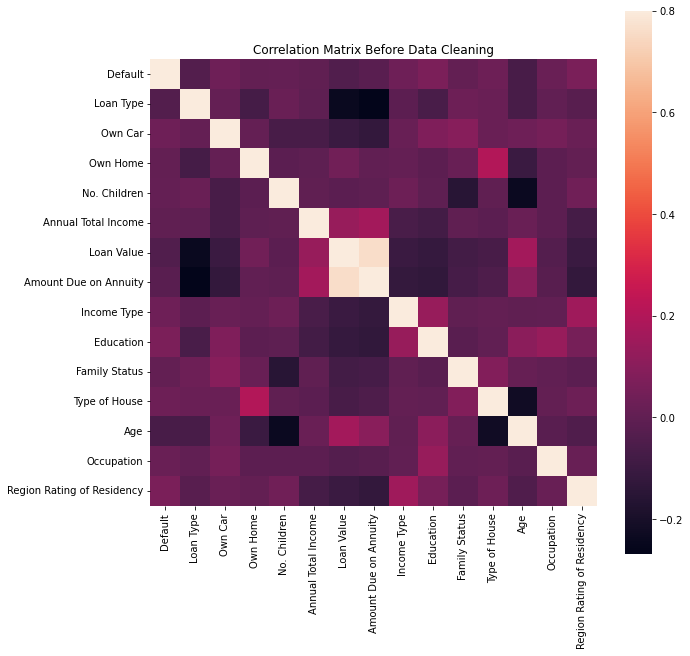

In [19]:
#Correlation Matrix
#Reference https://datatofish.com/correlation-matrix-pandas/
plt.rcParams["figure.figsize"] = (10,10)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, vmax = .8, square = True)
plt.title("Correlation Matrix Before Data Cleaning")
#NEED TO SAVE FIG

plt.show()

In [20]:
data = data.astype(float)

In [21]:
#Setting values of x and y for data training
x = data.drop(['Default'], axis=1)
y = data["Default"]

In [22]:
#Reference https://towardsdatascience.com/how-to-split-
#data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

x_train, x_left, y_train, y_left = train_test_split(x, y, train_size=0.8,random_state=42,shuffle=True)

x_test, x_validation, y_test, y_validation = train_test_split(x_left,y_left, test_size=0.5,random_state=42,
                                                              shuffle=True)

In [23]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)
x_train, x_left, y_train, y_left = train_test_split(x, y, train_size=0.8,random_state=42,shuffle=True)
x_test, x_validation, y_test, y_validation = train_test_split(x_left,y_left, test_size=0.5,random_state=42,
                                                              shuffle=True)

### Random Forest

In [24]:
#We will now train our model using the balance train dataset, and make a prediction using the validation 
#data so we can measure the change in performance after hypertuning the parameters.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_model_prediction_validation = rf_model.predict(x_validation)

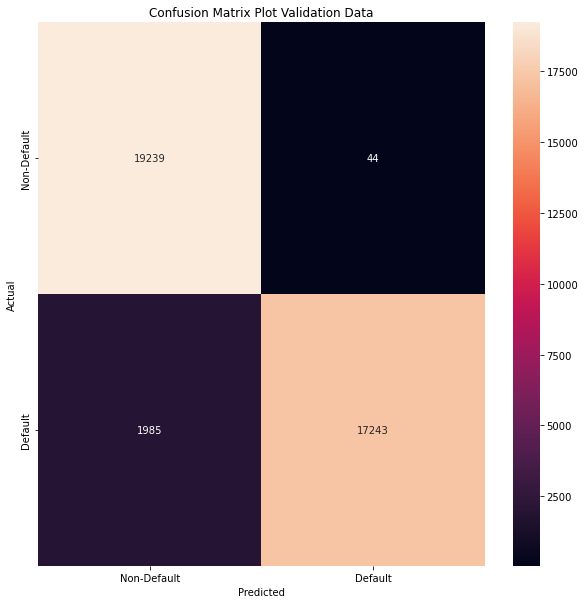

In [25]:
#Confusion Matrix Plot to show the performance of the x_validation data prior to hyperparameter tuning.
confusion_matrix_test = confusion_matrix(y_validation, rf_model_prediction_validation)

x_tick = ['Non-Default', 'Default']
y_tick = ['Non-Default', 'Default']
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_test, xticklabels=x_tick, yticklabels=y_tick, fmt = "1", annot=True)
plt.title("Confusion Matrix Plot Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion Matrix Pre-Tuning.png')

plt.show()

In [26]:
recall_score(y_validation, rf_model_prediction_validation)

0.8967651341793218

### XGBOOST

In [27]:
xg_model = XGBClassifier()

In [28]:
xg_model_prediction = xg_model.fit(x_train, y_train).predict(x_validation)

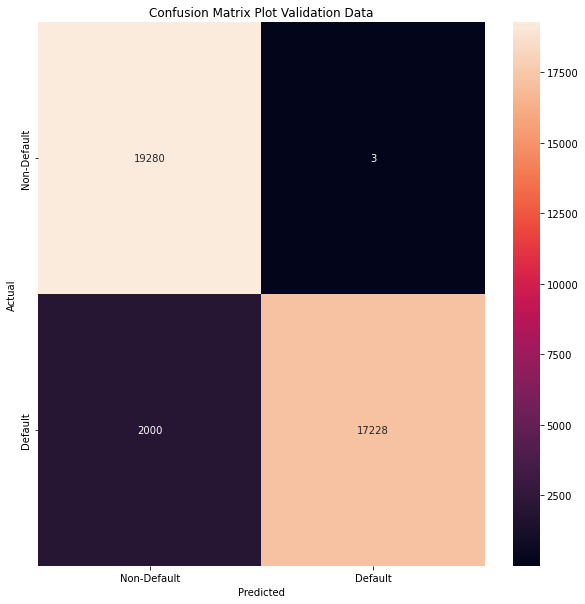

In [29]:
confusion_matrix_test = confusion_matrix(y_validation, xg_model_prediction)

x_tick = ['Non-Default', 'Default']
y_tick = ['Non-Default', 'Default']
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_test, xticklabels=x_tick, yticklabels=y_tick, fmt = "1", annot=True)
plt.title("Confusion Matrix Plot Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusio`n Matrix Pre-Tuning.png')

plt.show()

In [30]:
recall_score(y_validation, xg_model_prediction)

0.8959850218431454

### Naive Bayes

In [31]:
nb_model = GaussianNB()
nb_model_prediction = nb_model.fit(x_train, y_train).predict(x_validation)

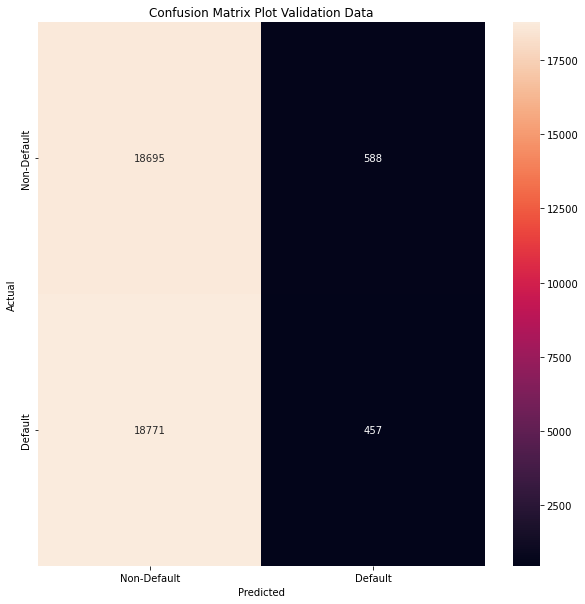

In [32]:
confusion_matrix_test = confusion_matrix(y_validation, nb_model_prediction)

x_tick = ['Non-Default', 'Default']
y_tick = ['Non-Default', 'Default']
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_test, xticklabels=x_tick, yticklabels=y_tick, fmt = "1", annot=True)
plt.title("Confusion Matrix Plot Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion Matrix Pre-Tuning.png')

plt.show()

In [33]:
nb_model = GaussianNB()
nb_model_prediction = nb_model.fit(x_train, y_train).predict(x_validation)

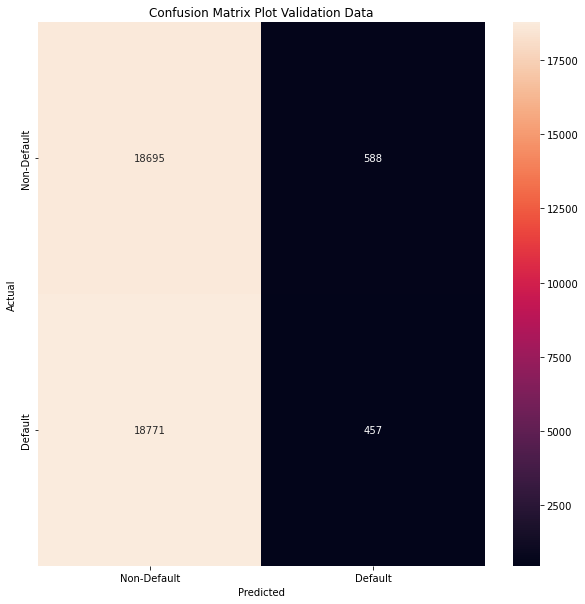

In [34]:
confusion_matrix_test = confusion_matrix(y_validation, nb_model_prediction)

x_tick = ['Non-Default', 'Default']
y_tick = ['Non-Default', 'Default']
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_test, xticklabels=x_tick, yticklabels=y_tick, fmt = "1", annot=True)
plt.title("Confusion Matrix Plot Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion Matrix Pre-Tuning.png')

plt.show()

### K-Nearest Neighbours

In [35]:
kn_model = KNeighborsClassifier(n_neighbors=3)
kn_model.fit(x_train,y_train)
kn_model_prediction = kn_model.predict(x_validation)

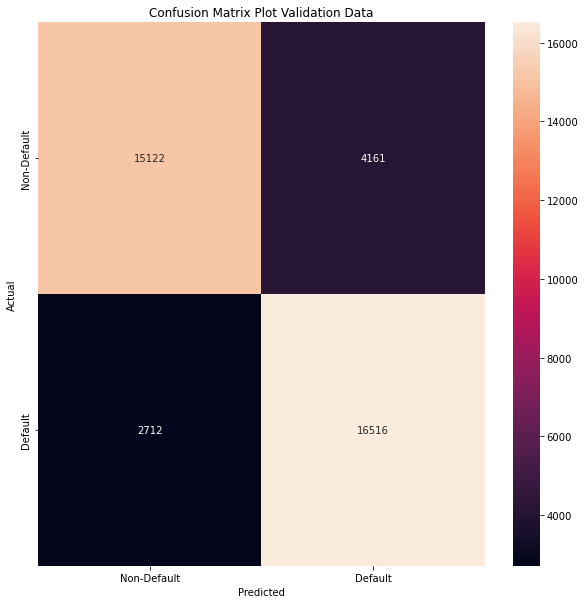

In [36]:
#Confusion Matrix Plot to show the performance of the x_validation data prior to hyperparameter tuning.
confusion_matrix_test = confusion_matrix(y_validation, kn_model_prediction)

x_tick = ['Non-Default', 'Default']
y_tick = ['Non-Default', 'Default']
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_test, xticklabels=x_tick, yticklabels=y_tick, fmt = "1", annot=True)
plt.title("Confusion Matrix Plot Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion Matrix Pre-Tuning.png')

plt.show()

In [37]:
recall_score(y_validation, kn_model_prediction)

0.8589556896193051

### Logistic Regression

In [38]:
lr_model = LogisticRegression(random_state=0).fit(x_train, y_train)
lr_model.fit(x_train,y_train)
lr_model_prediction_validation = lr_model.predict(x_validation)

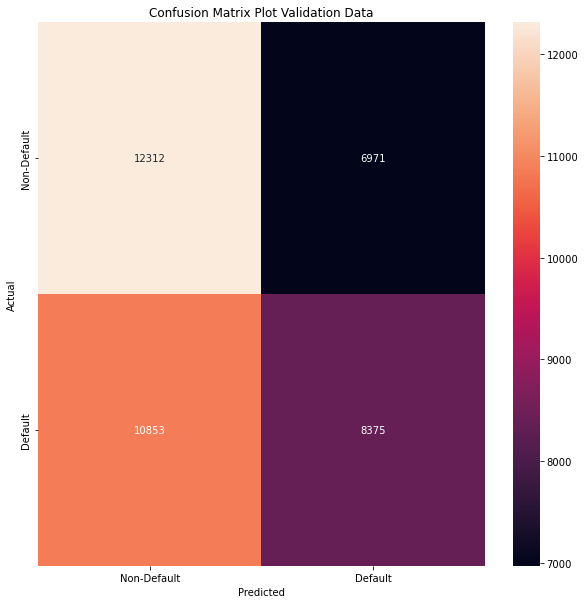

In [39]:
#Confusion Matrix Plot to show the performance of the x_validation data prior to hyperparameter tuning.
confusion_matrix_test = confusion_matrix(y_validation, lr_model_prediction_validation)

x_tick = ['Non-Default', 'Default']
y_tick = ['Non-Default', 'Default']
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_test, xticklabels=x_tick, yticklabels=y_tick, fmt = "1", annot=True)
plt.title("Confusion Matrix Plot Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion Matrix Pre-Tuning.png')

plt.show()

In [40]:
recall_score(y_validation, rf_model_prediction_validation)

0.8967651341793218

### Parameter Tuning

In [41]:
parameters = { 
    'n_estimators': [5, 20, 100],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,25],
    'reg_alpha': [1.1, 1.3],
    'reg_lambda': [1.1, 1.3],
    'subsample': [0.7, 0.9]
}

In [42]:
#Setting our parameter tuning/cross validation method
grid_search = GridSearchCV(estimator=xg_model,param_grid=parameters,scoring='recall', cv = 2, verbose=1)

In [43]:
xg_model_prediction = xg_model.fit(x_train, y_train).predict(x_validation)

In [44]:
grid_search.fit(x_validation, y_validation)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimator

In [45]:
grid_search.best_score_

0.8949448720615769

In [46]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1.3, reg_lambda=1.1, ...)

### Final Testing

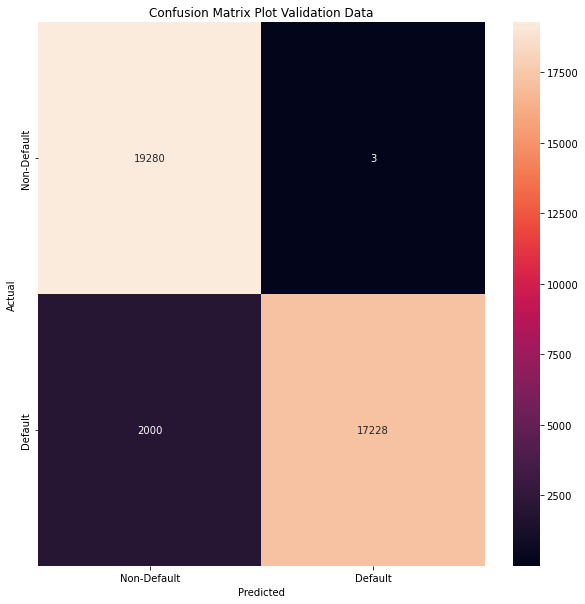

In [47]:
confusion_matrix_test = confusion_matrix(y_validation, xg_model_prediction)

x_tick = ['Non-Default', 'Default']
y_tick = ['Non-Default', 'Default']
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_test, xticklabels=x_tick, yticklabels=y_tick, fmt = "1", annot=True)
plt.title("Confusion Matrix Plot Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Confusion Matrix Pre-Tuning.png')

plt.show()

In [48]:
grid_search.best_score_

0.8949448720615769

In [49]:
recall_score(y_validation, xg_model_prediction)

0.8959850218431454